In [1]:
from tensorflow import keras
import random
import os
import cv2 as cv

2025-03-30 05:30:17.488926: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 05:30:23.507642: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 05:30:23.516964: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-30 05:30:35.140049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np

In [3]:
husky_train=os.listdir('data/train/husky')
wolf_train=os.listdir('data/train/wolf')


In [26]:
# Create a random mix of husky and wolf images
mixed_data = [(img, 0) for img in husky_train] + [(img, 1) for img in wolf_train]
random.shuffle(mixed_data)

# Separate features (X) and labels (Y)
images_names = [item[0] for item in mixed_data]
Y = np.array([item[1] for item in mixed_data])

print("images names:", images_names[:5])  # Display first 5 features
print("Labels (Y):", Y[:5])    # Display first 5 labels

images names: ['wolf_11.jpeg', 'husky_48.jpeg', 'husky_39.jpeg', 'husky_46.jpeg', 'wolf_15.jpeg']
Labels (Y): [1 0 0 0 1]


In [20]:
X=np.array([ cv.resize(cv.imread(f"data/train/{i.split('_')[0]}/{i}"),(170,170)) for i in images_names ])


In [6]:
import matplotlib.pyplot as plt

(170, 170, 3)


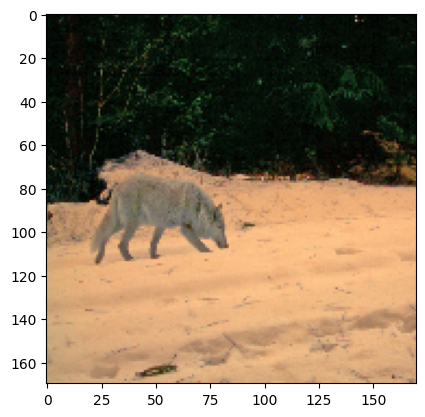

In [21]:
print(X[3].shape)
plt.imshow(X[3])



In [17]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(170, 170, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2025-03-30 05:34:37.500136: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23658496 exceeds 10% of free system memory.
2025-03-30 05:34:37.527385: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23658496 exceeds 10% of free system memory.
2025-03-30 05:34:37.600679: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23658496 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 168, 168, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 41, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 128)       0

In [22]:
model.fit(X,Y,epochs=30)

Epoch 1/30


2025-03-30 05:36:42.315076: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23658496 exceeds 10% of free system memory.
2025-03-30 05:36:42.325255: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23658496 exceeds 10% of free system memory.


3/3 [==============================] - 19s 3s/step - loss: 604.5032 - accuracy: 0.4937
Epoch 2/30
3/3 [==============================] - 9s 2s/step - loss: 13.5321 - accuracy: 0.4304
Epoch 3/30
3/3 [==============================] - 9s 3s/step - loss: 0.2696 - accuracy: 0.8608
Epoch 4/30
3/3 [==============================] - 9s 3s/step - loss: 0.0824 - accuracy: 0.9873
Epoch 5/30
3/3 [==============================] - 9s 3s/step - loss: 0.0174 - accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 8s 3s/step - loss: 0.0132 - accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 10s 3s/step - loss: 0.0050 - accuracy: 1.0000
Epoch 8/30
3/3 [==============================] - 9s 3s/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/30
3/3 [==============================] - 10s 3s/step - loss: 6.3587e-04 - accuracy: 1.0000
Epoch 10/30
3/3 [==============================] - 10s 3s/step - loss: 1.2319e-04 - accuracy: 1.0000
Epoch 11/30
3/3 [============================

In [23]:
husky_test=os.listdir('data/test/husky')
wolf_test=os.listdir('data/test/wolf')


In [40]:
mixed_data = [(img, 0) for img in husky_test] + [(img, 1) for img in wolf_test]
random.shuffle(mixed_data)

# Separate features (X) and labels (Y)
images_names = [item[0] for item in mixed_data]
Y_test = np.array([item[1] for item in mixed_data])

print("images names:", images_names[:5])  # Display first 5 features
print("Labels (Y):", Y_test[:5])    # Display first 5 labels

images names: ['wolf_17.jpeg', 'wolf_1.jpeg', 'husky_35.jpeg', 'wolf_0.jpeg', 'husky_37.jpeg']
Labels (Y): [1 1 0 1 0]


In [41]:
X_test=np.array([ cv.resize(cv.imread(f"data/test/{i.split('_')[0]}/{i}"),(170,170)) for i in images_names ])


In [53]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.2671 - accuracy: 0.9048


[0.2671225070953369, 0.9047619104385376]

In [51]:
index=8
if model.predict(np.array([X_test[index]]))>0.5:
    print("wolf")
else:
    print("husky")
print(Y_test[index])

1/1 [==============================] - 0s 200ms/step
wolf
1


In [54]:
model.save("wolf_husky_classifier")

INFO:tensorflow:Assets written to: wolf_husky_classifier/assets


INFO:tensorflow:Assets written to: wolf_husky_classifier/assets


In [57]:
from tensorflow.keras.models import load_model

In [58]:
model_load=load_model("wolf_husky_classifier")

In [62]:
predictions=model_load.predict(X_test)>0.5
for p,r in zip(predictions,Y_test):
    print(p,r)

1/1 [==============================] - 2s 2s/step
[ True] 1
[ True] 1
[False] 0
[ True] 1
[False] 0
[ True] 0
[False] 0
[False] 0
[ True] 1
[ True] 1
[False] 0
[False] 0
[ True] 0
[False] 0
[ True] 1
[False] 0
[ True] 1
[False] 0
[False] 0
[ True] 1
[ True] 1
